In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
x=[0,1]
y=[0,1]

# matplotlib.pyplot.plot(x,y, "o--",markersize=100)

In [4]:
from __future__ import division #skip
import time

import numpy as npy

from sklearn.svm import SVR #sklearn/svn directoryの中のclasses.pyファイルからSVRクラスをimportしている。
#.svmのあとに.classesを付けても良い。
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import pylab as pl #pylabはmatplotlib.pyplotと同じ意味

In [5]:
random_generator=npy.random.RandomState(1) #randomクラスのオブジェクト。乱数生成期の初期化。0というseedで初期化。

In [6]:
for i in xrange(1): #0から99までの列
    print random_generator.rand()

0.417022004703


In [7]:
#Generate sample data
Num_of_data=10000
divisor=5
assert Num_of_data%divisor==0,"Needs that Num_of_data%divisor==0" #assertは中がfalseのときにエラーを出す。

X=5*random_generator.rand(Num_of_data, 1)
print X
y=npy.sin(X).ravel() #ravel()を付けると行列がリストになる、numpyでは行列はリストの中にリストになると言える
print(y)
print(y[::2]) #syntax error 文法エラー #x::yではxからy個に一個値が出力される # x:: （y無し）ではy=1となる、::y（x無し）ではx=0となる
#Add noise to tagets
y[::divisor] += 3 * (0.5 - random_generator.rand(X.shape[0] // divisor)) 
#0.5 here behaves as the matrix with the same number of rows and columns as random_generator.rand(...).
#X.shape=(num_of_rows,num_of_columns). Therefore, X.shape[1]=num_of_rows, 
# for int types a,b,  a//b =a%b as in C language. i.e. devision of two integers, but does not return the remainder.


[[  3.60162247e+00]
 [  5.71874087e-04]
 [  1.51166286e+00]
 ..., 
 [  5.40218282e-01]
 [  3.81396889e+00]
 [  3.82748480e+00]]
[ -4.43974821e-01   5.71874056e-04   9.98252126e-01 ...,   5.14323201e-01
  -6.22846776e-01  -6.33363657e-01]
[-0.44397482  0.99825213  0.44546446 ..., -0.32567712  0.29329201
 -0.62284678]


In [8]:
X_plot = npy.linspace(0, 5, 100000)[:, None]
#linspace(a,b,num) return a list[a,...,b] with num elements.
#[:,None] converts a list to a matrix which is a column vector.


In [9]:
#Generate sample data
Num_of_data=10000
divisor=5

assert Num_of_data%divisor == 0, "the remainder of Num of data divided by divisor must be zero"



X=divisor*random_generator.rand(Num_of_data, 1)
print X
print X.shape[0]
y=npy.sin(X).ravel() #ravel()を付けると行列がリストになる、numpyでは行列はリストの中にリストになると言える
print(y)
print(y[::2]) #syntax error 文法エラー #x::yではxからy個に一個値が出力される # x:: （y無し）ではy=1となる、::y（x無し）ではx=0となる
#Add noise to tagets
y[::divisor] += 3 * (0.5 - random_generator.rand(X.shape[0] // divisor)) 
#0.5 here behaves as the matrix with the same number of rows and columns as random_generator.rand(...).
#X.shape=(num_of_rows,num_of_columns). Therefore, X.shape[1]=num_of_rows, 
# for int types a,b,  a//b =a%b as in C language. i.e. devision of two integers, but does not return the remainder.


[[ 2.90202915]
 [ 0.65114669]
 [ 1.31794453]
 ..., 
 [ 1.06603718]
 [ 2.00588743]
 [ 1.32533482]]
10000
[ 0.23727862  0.60609887  0.96820294 ...,  0.87529098  0.90683165
  0.97002528]
[ 0.23727862  0.96820294  0.35834003 ...,  0.38994865 -0.99275443
  0.90683165]


In [10]:
#Fit regression model
train_size = 100 #準備したデータの内 100個を用いて回帰する
svr = GridSearchCV(SVR(kernel="rbf", gamma=-0.1), cv=5,
                    param_grid={"C": [1e0, 1e1, 1e2, 1e3], 
                                "gamma":npy.logspace(-2, 2, 5)}, scoring="r2")
# gamma is "Kernel coefficient". In the case of rbf, it is in the exponential term.
# Cで4パターン、gammaで5パターンの合計 20通りで SVR の学習・評価をする、各C, gammmaで5回クロスバリデーションする
# "scoring ="で mertics を決定できる、何も書かない（デフォルト）だと、r2 になる

t0=time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit_time=time.time()-t0
print("SVR complexity and bandwith selected and model fitted in %.3f s"
     % svr_fit_time)


#best_estimator_ は最も高いスコアのモデルの結果を出力する
sv_ratio=svr.best_estimator_.support_.shape[0] / train_size 
print("Support vector ratio: %.3f" % sv_ratio)

t0=time.time()
y_svr_besr=svr.best_estimator_.predict(X_plot) #predict は　最も高いスコアのモデル予測結果を出力する
svr_predict_time=time.time()-t0
print("SVR prediction for %d inputs in %.3f s"
        %(X_plot.shape[0], svr_predict_time))


t0=time.time()
y_svr=svr.predict(X_plot)
svr_best_predict_time=time.time()-t0
print("SVR prediction for %d inputs in %.3f s"
        %(X_plot.shape[0], svr_best_predict_time))

SVR complexity and bandwith selected and model fitted in 1.270 s
Support vector ratio: 0.300
SVR prediction for 100000 inputs in 0.078 s
SVR prediction for 100000 inputs in 0.093 s


In [11]:
svr.cv_results_ #svrの結果をまとめて表示

{'mean_fit_time': array([ 0.00079999,  0.00020003,  0.00039997,  0.00099993,  0.00340004,
         0.        ,  0.        ,  0.        ,  0.00320001,  0.00299997,
         0.00320001,  0.00619998,  0.0046    ,  0.01240001,  0.        ,
         0.        ,  0.01700001,  0.02799997,  0.09440002,  0.00320001]),
 'mean_score_time': array([ 0.00079999,  0.00040002,  0.00040002,  0.        ,  0.00320001,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.00019999,  0.        ,  0.        ,
         0.00620003,  0.00020003,  0.00040002,  0.00320001,  0.        ]),
 'mean_test_score': array([ 0.53414641,  0.72932344,  0.73603756,  0.71375025,  0.64936056,
         0.61457341,  0.74701592,  0.73706062,  0.65203195,  0.58508864,
         0.65509148,  0.74370338,  0.70295852,  0.58224019,  0.41545537,
         0.72655486,  0.73577397,  0.70346304,  0.46275423, -0.87803361]),
 'mean_train_score': array([ 0.55265592,  0.73467768,  0.774323

[ 0  2  5  8 10 11 20 25 30 35 39 40 43 45 46 50 52 53 55 60 65 70 71 75 78
 80 85 90 95 98]
[ 0  2  5  8 10 11 20 25 30 35]


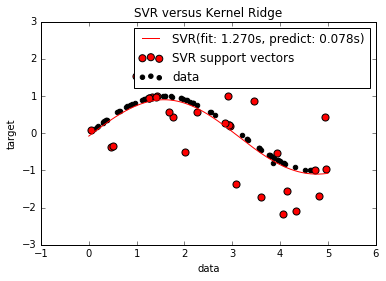

In [13]:
sv_ind = svr.best_estimator_.support_
print sv_ind
print sv_ind[:10]
plt.scatter(X[sv_ind], y[sv_ind], c="r", s=50, label="SVR support vectors", zorder=2)
#this is as same as plt.plot(X[sv_ind], y[sv_ind], c="r", marker='o',linestyle="none",label="SVR support vectors", zorder=2)

# plt.scatter(X[[0,2,5,8,10,11,20,25,30,35,39,40,43,45,46,50,52,53,55,60,65,70,71,75,78
# ,80,85,90,95,98]], y[[[0,2,5,8,10,11,20,25,30,35,39,40,43,45,46,50,52,53,55,60,65,70,71,75,78
# ,80,85,90,95,98]]],c="k", label="data", zorder=2)

plt.scatter(X[:100],y[:100],c="k", label="data", zorder=1)
plt.hold("on")
plt.plot(X_plot, y_svr, c="r", label="SVR(fit: {0:.3f}s, predict: {1:.3f}s)".format(svr_fit_time, svr_predict_time))
#same as plt.plot(X_plot, y_svr, c='r',label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.xlabel("data")
plt.ylabel("target")
plt.title("SVR versus Kernel Ridge")
plt.legend()

In [110]:
some_string="{:.5f}s"
print some_string
formatted_string=some_string.format(1.23000000)
print formatted_string

{:.5f}s
1.23000s


In [35]:
sv_ind[0]

0

In [43]:
print X[sv_ind[[0,1]]]
print X[[0,2]]

[[ 2.90202915]
 [ 1.31794453]]
[[ 2.90202915]
 [ 1.31794453]]


In [50]:
sv_ind[[0,2,5,8,10,11,20,25,30,35,39,40,43,45,46,50,52,53,55,60,65,70,71,75,78
,80,85,90,95,98]]

IndexError: index 30 is out of bounds for axis 0 with size 30